In [8]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
#from torchvision.datasets.utils import download_url
from torchvision.datasets import CIFAR100
#from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [9]:
# Data transforms (normalization & data augmentation)
criterion = nn.CrossEntropyLoss()

stats = ((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))      #cifar100

train_tfms = tt.Compose([tt.RandomCrop(32, padding=4, padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(), 
                         # tt.RandomRotate
                         # tt.RandomResizedCrop(256, scale=(0.5,0.9), ratio=(1, 1)), 
                         # tt.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)])
valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)])

In [10]:
# PyTorch datasets

train_ds = CIFAR100(root = './data/', download = True, transform = train_tfms)
valid_ds = CIFAR100(root = './data/', train = False, transform = valid_tfms)

Files already downloaded and verified


In [11]:
print(train_ds)
print(valid_ds)
print(len(train_ds))
print(len(valid_ds))
print('total classes:', len(train_ds.classes))
print(train_ds.classes)



Dataset CIFAR100
    Number of datapoints: 50000
    Root location: ./data/
    Split: Train
    StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           )
Dataset CIFAR100
    Number of datapoints: 10000
    Root location: ./data/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           )
50000
10000
total classes: 100
['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',

In [5]:
# IMP - modify if OOM
torch.autograd.set_detect_anomaly(True)
batch_size = 1

In [6]:
# PyTorch data loaders
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size, num_workers=3, pin_memory=True)

In [7]:
# def denormalize(images, means, stds):
#     means = torch.tensor(means).reshape(1, 3, 1, 1)
#     stds = torch.tensor(stds).reshape(1, 3, 1, 1)
#     return images * stds + means

# def show_batch(dl):
#     for images, labels in dl:
#         fig, ax = plt.subplots(figsize=(12, 12))
#         ax.set_xticks([]); ax.set_yticks([])
#         denorm_images = denormalize(images, *stats)
#         ax.imshow(make_grid(denorm_images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
#         break

In [8]:
# show_batch(train_dl)

class TreeNode():
    children = []
    parent = None
    labelName = ""
    level = 0
    index = None
    
    def __init__(self, label, parent, level):
        self.labelName = label
        self.parent = parent
        self.level = level
    
    def get_children(self):
        return self.children
    
    def get_parent(self):
        return self.parent
    
    def get_label(self):
        return self.labelName
    
    def get_level(self):
        return self.level
    
    def get_index(self):
        return self.index


def get_anc_level(lev, node):
    anc = node
    while anc.level > lev:
        anc = anc.parent
    return anc
    
levels = [
     {
        "root": ["animals", "nature", "man-made"]
     },
     {
        "animals": ["aquatic animals", 	"small-animals", "big-animals"],
        "nature": ["flora"],
        "man-made": ["manmade-outdoor", "manmade-indoor"]
     },
     {
        "aquatic animals": ["aquatic mammals", "fish"],
        "flora": ["flowers", "trees","fruit and vegetables", "large natural outdoor scenes"],
        "manmade-outdoor": ["vehicles 1", "vehicles 2", "large man-made outdoor things"],
        "manmade-indoor": ["household furniture", "household electrical devices", "food containers"],
        "small-animals": ["insects", "small mammals", "non-insect invertebrates"],
        "big-animals": ["large carnivores", "large omnivores and herbivores", "medium-sized mammals","people", "reptiles"]
     },
     {
        "aquatic mammals": ["beaver", "dolphin", "otter", "seal", "whale"],
        "fish": ["aquarium_fish", "flatfish", "ray", "shark", "trout"],
        "flowers": ["orchid", "poppy", "rose", "sunflower", "tulip"],
        "food containers": ["bottle", "bowl", "can", "cup", "plate"],
        "fruit and vegetables": ["apple", "mushroom", "orange", "pear", "sweet_pepper"],
        "household electrical devices": ["clock", "keyboard", "lamp", "telephone", "television"],
        "household furniture": ["bed", "chair", "couch", "table", "wardrobe"],
        "insects": ["bee", "beetle", "butterfly", "caterpillar", "cockroach"],
        "large carnivores": ["bear", "leopard", "lion", "tiger", "wolf"],
        "large man-made outdoor things": ["bridge", "castle", "house", "road", "skyscraper"],
        "large omnivores and herbivores": ["camel", "cattle", "chimpanzee", "elephant", "kangaroo"],
        "medium-sized mammals": ["fox", "porcupine", "possum", "raccoon", "skunk"],
        "non-insect invertebrates": ["crab", "lobster", "snail", "spider", "worm"],
        "people": ["baby", "boy", "girl", "man", "woman"],
        "reptiles": ["crocodile", "dinosaur", "lizard", "snake", "turtle"],
        "small mammals": ["hamster", "mouse", "rabbit", "shrew", "squirrel"],
        "trees": ["maple_tree", "oak_tree", "palm_tree", "pine_tree", "willow_tree"],
        "vehicles 1": ["bicycle", "bus", "motorcycle", "pickup_truck", "train"],
        "vehicles 2": ["lawn_mower", "rocket", "streetcar", "tank", "tractor"],
        "large natural outdoor scenes": ["cloud", "forest", "mountain", "plain", "sea"]
     }
]

labelMap = [[] for i in range(len(levels) + 1)]

root_node = TreeNode("root", None, 0)
root_node.parent = root_node
queue = [root_node]
while len(queue) > 0:
    node = queue.pop()
    level = node.get_level()
    label = node.get_label()
    node.index = len(labelMap[level])
    labelMap[level].append(node)

    if level < len(levels):
        for child_label in levels[level].get(label,[]):
            child_node = TreeNode(child_label, node, level+1)
            child_node.children = []
            node.children.append(child_node)
            queue.insert(0, child_node)
        
numC = 1
# for level in range(len(labelMap)):
#     print(level)
#     for i in range(len(labelMap[level])):
#         print(range(len(labelMap[level])))
    
for level, items in enumerate(labelMap):
    numC += len(items)

# print(numC)

classLabels = []

def recur(root):
    if len(root.children) == 0:
        classLabels.append(root)
        return
    for ch in root.children:
        recur(ch)
    return

recur(root_node)

classLabels = sorted(classLabels, key = lambda node : node.labelName)
print(len(classLabels))


# for i in classLabels:
#     present = False
#     for j in train_ds.classes:
#         if(j == i.labelName):
#             present = True
#     if(present == False):
#         print(i.labelName)

# classLabels

# for i in range(100):
#     print(labelMap[4][i].index)
#     print(labelMap[4][i].labelName)
    
# print('Next')
# for i in range(100):
#     print(classLabels[i].index)
#     print(labelMap[4][classLabels[i].index].labelName)
    

100


In [9]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [10]:
device = get_default_device()
device

device(type='cpu')

In [11]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)
print_Val = True

In [12]:
# def accuracy(outputs, labels):
#     preds = torch.zeros(outputs.shape[0])
# #     to_device(preds, device)
#     for i in range(len(labels)):
#         idx = 0
#         maxVal = -1000000000
#         trueNode = classLabels[labels[i]]            
#         predNode = None
#         for lev in labelMap:
#             for node in lev:
#                 if len(node.children) == 0:
#                     if outputs[i][idx] > maxVal:
#                         maxVal = outputs[i][idx]
#                         predNode = node
#                 idx += 1
#         print(trueNode.labelName)
#         print(predNode.labelName)
#         if trueNode.labelName == predNode.labelName:
#             preds[i] = 1
        
        
# #     _, preds = torch.max(outputs[fineLabelIdx:], dim=1)
#     return torch.tensor(torch.sum(preds).item() / len(preds))

def calc_Distance(node1, node2):
    anc1List = []
    anc2List = []
    anc1 = node1
    anc2 = node2
    anc1List.append(node1)
    anc2List.append(node2)
    while(anc1List[-1] != anc2List[-1]):
        anc1List.append(anc1.parent)
        anc1 = anc1.parent
        anc2List.append(anc2.parent)
        anc2 = anc2.parent
        
    return (2*len(anc1List) - 2)


def accuracy(outputs, labels):
#     _, preds = torch.max(outputs[:,30:130], dim=1)
    _, preds = torch.max(outputs, dim=1)
    true_outputs = torch.zeros(outputs.shape[0], dtype = torch.long)
    true_outputs = to_device(true_outputs, device)
    for i in range(outputs.shape[0]):
        true_outputs[i] = classLabels[labels[i]].index
        
    return torch.tensor(torch.sum(preds == true_outputs).item() / len(preds))

def treeCriteria(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    
    true_outputs = torch.zeros(outputs.shape[0], dtype = torch.long)
    true_outputs = to_device(true_outputs, device)
    tree_Distance = torch.zeros(outputs.shape[0])
    tree_Distance = to_device(tree_Distance, device)
    for i in range(outputs.shape[0]):
        true_outputs[i] = classLabels[labels[i]].index
    
    for i in range(outputs.shape[0]):
        tree_Distance[i] = calc_Distance(classLabels[preds[i].item()], classLabels[true_outputs[i].item()])
        
    return torch.tensor(torch.sum(tree_Distance).item() / len(tree_Distance))


class customLoss(nn.Module):
    
    def __init__(self):
        super(customLoss, self).__init__() 
        
# OvA Hinge        
#     def forward(self, pred, targets):
#         tmp = torch.ones(pred.shape[0], pred.shape[1])
#         tmp = to_device(tmp,device)
#         pred = to_device(pred,device)
        
#         for i in range(pred.shape[0]):
#             node = classLabels[targets[i]]
#             tmp[i][targets[i]] = -1
            
#         tmp2 = (1+torch.mul(tmp,pred)).clamp(min=0).sum(dim=1)        
#         loss = torch.mean(tmp2)     
#         return loss


    def forward(self, pred, targets): 
        tmp = torch.ones(pred.shape[0], len(labelMap) , dtype = torch.long)
        tmp = to_device(tmp,device)
        pred = to_device(pred,device)
    
        loss_batch = torch.zeros(pred.shape[0])
        for i in range(pred.shape[0]):
            baseIndex = 0
            node = classLabels[targets[i]]
            tmp[i] = node.index      
            for l in range(len(labelMap)):
                anc = get_anc_level(l,node)
                tmp[i][l] = anc.index
                baseIndex += len(labelMap[l])
                
            
        baseIndex = 0
        loss_batch1 = criterion(pred[:,baseIndex:baseIndex + len(labelMap[0])], tmp[:,0])
        baseIndex += len(labelMap[0])
        loss_batch2 = criterion(pred[:,baseIndex:baseIndex + len(labelMap[1])], tmp[:,1])
        baseIndex += len(labelMap[1])
        loss_batch3 = criterion(pred[:,baseIndex:baseIndex + len(labelMap[2])], tmp[:,2])
        baseIndex += len(labelMap[2])
        loss_batch4 = criterion(pred[:,baseIndex:baseIndex + len(labelMap[3])], tmp[:,3])
        baseIndex += len(labelMap[3])
        loss_batch5 = criterion(pred[:,baseIndex:baseIndex + len(labelMap[4])], tmp[:,4])
        baseIndex += len(labelMap[4])
        loss_batch = loss_batch1 + loss_batch2 + loss_batch3 + loss_batch4 + loss_batch5
        loss = torch.mean(loss_batch)  
        return loss

#         loss_batch = criterion(pred, tmp)
#         tmp = torch.ones(pred.shape[0], dtype = torch.long)


    
criterion1 = customLoss()

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
#         loss = F.cross_entropy(out, labels) # Calculate loss
        loss = criterion1(out,labels)
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = criterion1(out,labels)
        acc = accuracy(out, labels)           # Calculate accuracy
        treeLoss = treeCriteria(out,labels)   # tree loss
        return {'val_loss': loss.detach(), 'val_acc': acc, 'tree_loss': treeLoss}
        
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        batch_treeLoss = [x['tree_loss'] for x in outputs]
        epoch_treeLoss = torch.stack(batch_treeLoss).mean()      # Combine tree loss
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item(), 'tree_loss': epoch_treeLoss.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}, tree_loss: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc'], result['tree_loss']))

In [13]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        # 3 x 32 x 32
        self.conv1 = conv_block(in_channels, 64)         # 64 x 32 x 32
        self.conv2 = conv_block(64, 128, pool=True)      # 128 x 16 x 16
        self.res1 = nn.Sequential(conv_block(128, 128), 
                                  conv_block(128, 128))  # 128 x 16 x 16
        
        self.conv3 = conv_block(128, 256, pool=True)    # 256 x 8 x 8
        self.conv4 = conv_block(256, 512, pool=True)    # 512 x 4 x 4
        self.res2 = nn.Sequential(conv_block(512, 512), 
                                  conv_block(512, 512))  # 512 x 4 x 4
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), # 512 x 1 x 1
                                        nn.Flatten(),     # 512
                                        nn.Dropout(0.2),  
                                        nn.Linear(512, 256),
                                        nn.ReLU(inplace=True),
                                        nn.Linear(256,num_classes)) # 100
        
    def forward(self, xb):
        out1 = self.conv1(xb)
        out2 = self.conv2(out1)
        out3 = self.res1(out2) + out2
        out4 = self.conv3(out3)
        out5 = self.conv4(out4)
        out6 = self.res2(out5) + out5
        out = self.classifier(out6)
        return out

In [14]:
model = to_device(ResNet9(3, 100), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [15]:
# call model eval before doing any evaluation - good practice
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [16]:
history = [evaluate(model, valid_dl)]
history = []

KeyboardInterrupt: 

In [ ]:
epochs = 40
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [ ]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

In [12]:
val_acc_base = [0.2005, 
0.2721, 
0.3642, 
0.3632, 
0.4196, 
0.4191, 
0.4463, 
0.4502, 
0.4472, 
0.4736, 
 0.4983,
 0.5081,
 0.4491,
 0.4860,
 0.4359,
 0.5386,
 0.5187,
 0.5214,
 0.4873,
 0.5068,
 0.5285,
 0.5373,
 0.5544,
 0.5466,
 0.5731,
 0.5593,
 0.5714,
 0.5483,
 0.5967,
 0.6006,
 0.5994,
 0.6248,
 0.6269,
 0.6365,
 0.6492,
 0.6561,
 0.6655,
 0.6728,
 0.6838,
 0.6901,
 0.6977,
 0.7082,
 0.7169,
 0.7183,
 0.7253,
 0.7249,
 0.7303,
 0.7292,
 0.7301,
 0.7287]

In [13]:
val_acc_hier = [
    0.1652, 
0.2715, 
0.3041, 
0.3161, 
0.3713, 
0.4240, 
0.3889, 
0.5018, 
0.4819, 
0.4979, 
 0.5172,
 0.5254,
 0.4938,
 0.5182,
 0.5118,
 0.5340,
 0.5505,
 0.5624,
 0.5513,
 0.5352,
 0.5602,
 0.5850,
 0.5750,
 0.5686,
 0.5898,
 0.6034,
 0.6060,
 0.5976,
 0.6225,
 0.6126,
 0.6266,
 0.6370,
 0.6194,
 0.6437,
 0.6615,
 0.6617,
 0.6823,
 0.6821,
 0.7032,
 0.7011,
 0.7091,
 0.7174,
 0.7280,
 0.7303,
 0.7320,
 0.7369,
 0.7382,
 0.7387,
 0.7400,
 0.7400
]

In [32]:
def plot_accuracies():
#     accuracies = [x['val_acc'] for x in history]
#     plt.plot(accuracies, '-x')
    plt.plot(val_acc_base, '-rx')
    plt.plot(val_acc_hier, '-bx')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');
    plt.legend(['Base-ResNet', 'Hierarchical-ResNet'])
    plt.savefig('accuracyGraph')
    plt.ylim([0.4,0.8])

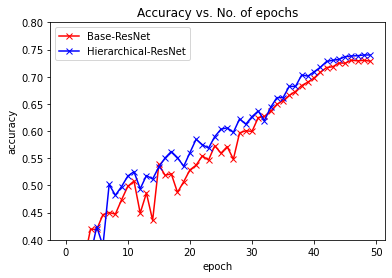

In [33]:
plot_accuracies()


In [20]:
tree_loss_hier = [
    5.6374,
4.8778,
4.7220,
4.6688,
4.1740,
3.9092,
4.0736,
3.3532,
3.4608,
3.3710,
3.2090,
3.1700,
3.4328,
3.2312,
3.3000,
3.0526,
3.0180,
2.9538,
3.0446,
3.1122,
2.9882,
2.8056,
2.8770,
2.9144,
2.7554,
2.6732,
2.6322,
2.6826,
2.5514,
2.5822,
2.5058,
2.4250,
2.5558,
2.4012,
2.2638,
2.2706,
2.1264,
2.1268,
1.9982,
2.0064,
1.9498,
1.8890,
1.8314,
1.8094,
1.7988,
1.7638,
1.7554,
1.7504,
1.7396,
1.7394
]

In [21]:
tree_loss_base = [
    5.2808,
    4.8768,
    4.2434,
    4.2932,
    3.8644,
    3.8902,
    3.6906,
    3.7202,
    3.7418,
    3.5440,
    3.3292,
    3.2734,
    3.6300,
    3.4428,
    3.7672,
    3.1020,
    3.2466,
    3.2174,
    3.4692,
    3.3224,
    3.1544,
    3.0894,
    2.9964,
    3.0326,
    2.8434,
    2.9552,
    2.8742,
    3.0416,
    2.6926,
    2.6962,
    2.6490,
    2.5170,
    2.4944,
    2.4286,
    2.3438,
    2.3130,
    2.2502,
    2.1988,
    2.1152,
    2.0838,
    2.0270,
    1.9506,
    1.8954,
    1.8922,
    1.8456,
    1.8426,
    1.8166,
    1.8156,
    1.8138,
    1.8178
]

In [28]:
def plot_losses():
#     train_losses = [x.get('train_loss') for x in history]
#     val_losses = [x['val_loss'] for x in history]
#     tree_loss = [x['tree_loss'] for x in history]
    plt.plot(tree_loss_base, '-rx')
    plt.plot(tree_loss_hier, '-bx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['TreeLoss-Base', 'TreeLoss-Hier'])
    plt.title('Loss vs. No. of epochs');
    plt.ylim([1.5,3.5])

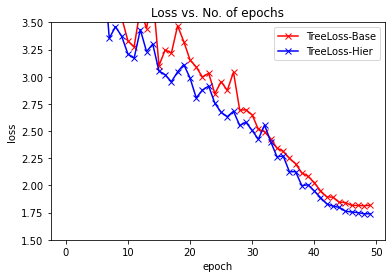

In [29]:
plot_losses()